# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df = pd.read_csv(r"C:\Users\bodak\Downloads\Parkinson's Disease\parkinsons.csv")

In [3]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [6]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Data Understanding

In [7]:
pd.set_option('display.max_columns',None)
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [9]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.ndim

2

In [13]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [14]:
df.select_dtypes(include='object')

,name
0,phon_R01_S01_1
1,phon_R01_S01_2
2,phon_R01_S01_3
3,phon_R01_S01_4
4,phon_R01_S01_5
...,...
190,phon_R01_S50_2
191,phon_R01_S50_3
192,phon_R01_S50_4
193,phon_R01_S50_5


In [15]:
df['name'].unique()

array(['phon_R01_S01_1', 'phon_R01_S01_2', 'phon_R01_S01_3',
       'phon_R01_S01_4', 'phon_R01_S01_5', 'phon_R01_S01_6',
       'phon_R01_S02_1', 'phon_R01_S02_2', 'phon_R01_S02_3',
       'phon_R01_S02_4', 'phon_R01_S02_5', 'phon_R01_S02_6',
       'phon_R01_S04_1', 'phon_R01_S04_2', 'phon_R01_S04_3',
       'phon_R01_S04_4', 'phon_R01_S04_5', 'phon_R01_S04_6',
       'phon_R01_S05_1', 'phon_R01_S05_2', 'phon_R01_S05_3',
       'phon_R01_S05_4', 'phon_R01_S05_5', 'phon_R01_S05_6',
       'phon_R01_S06_1', 'phon_R01_S06_2', 'phon_R01_S06_3',
       'phon_R01_S06_4', 'phon_R01_S06_5', 'phon_R01_S06_6',
       'phon_R01_S07_1', 'phon_R01_S07_2', 'phon_R01_S07_3',
       'phon_R01_S07_4', 'phon_R01_S07_5', 'phon_R01_S07_6',
       'phon_R01_S08_1', 'phon_R01_S08_2', 'phon_R01_S08_3',
       'phon_R01_S08_4', 'phon_R01_S08_5', 'phon_R01_S08_6',
       'phon_R01_S10_1', 'phon_R01_S10_2', 'phon_R01_S10_3',
       'phon_R01_S10_4', 'phon_R01_S10_5', 'phon_R01_S10_6',
       'phon_R01_S13_1',

In [16]:
df['status'].unique()

array([1, 0], dtype=int64)

In [17]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

# Data Preprocessing

In [18]:
df = df.drop(columns='name',axis=1)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<AxesSubplot:xlabel='status', ylabel='count'>

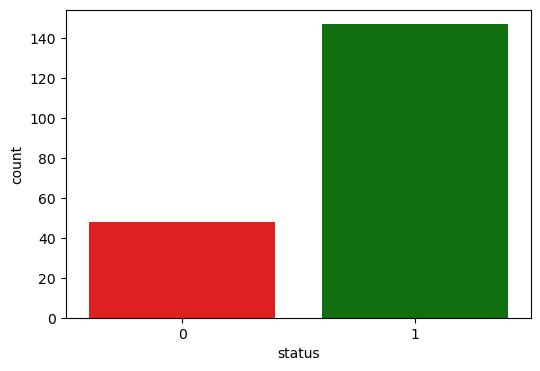

In [19]:
# Create the countplot
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
sns.countplot(x='status', data=df, palette={0: 'red', 1: 'green'})

# outlier Detection

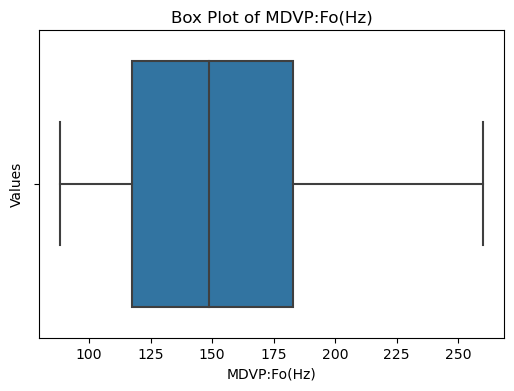

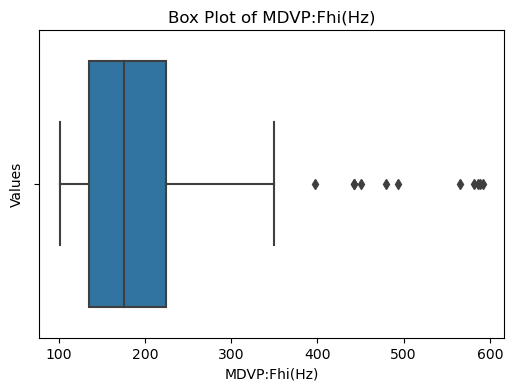

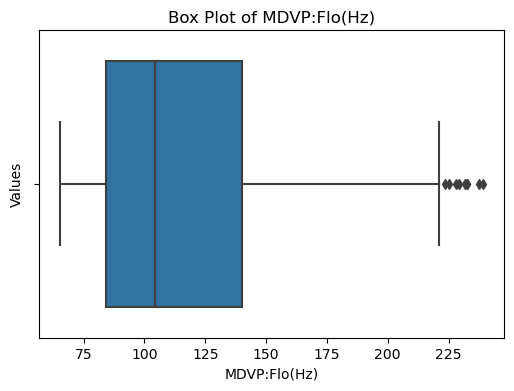

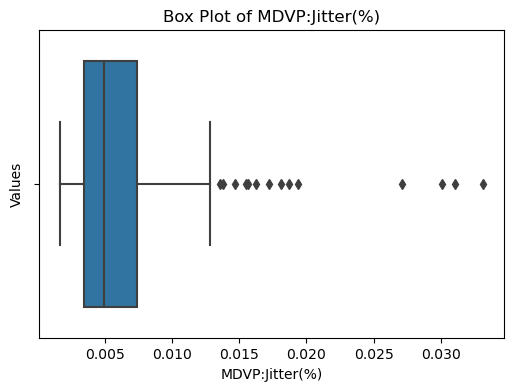

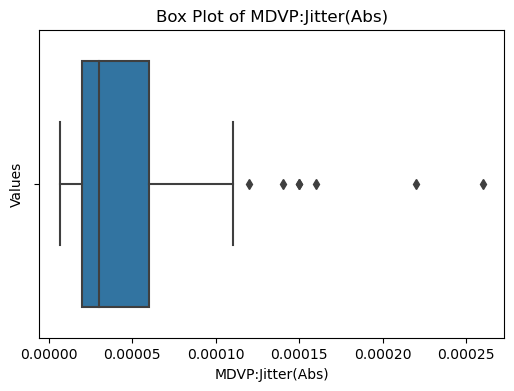

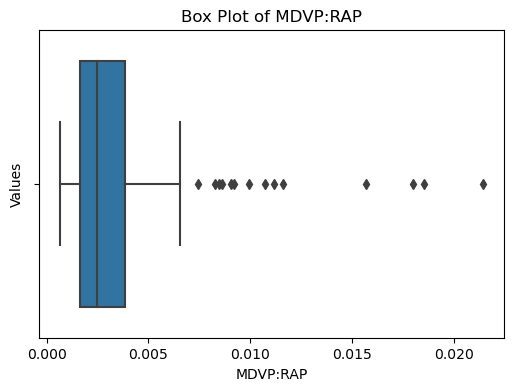

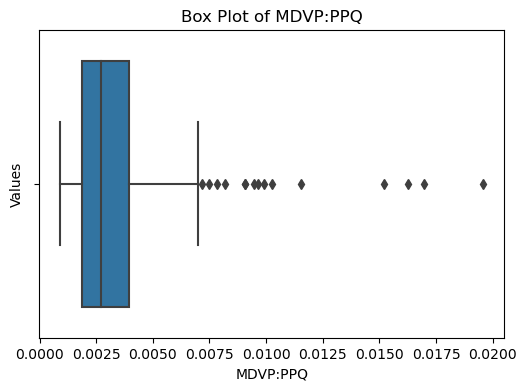

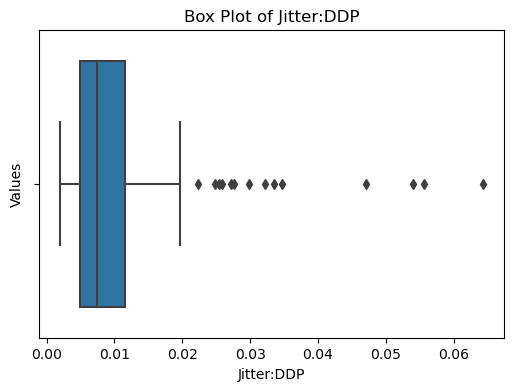

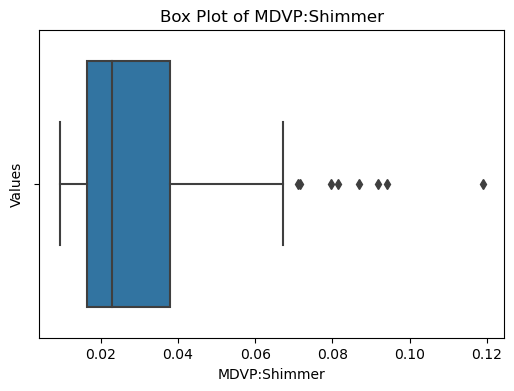

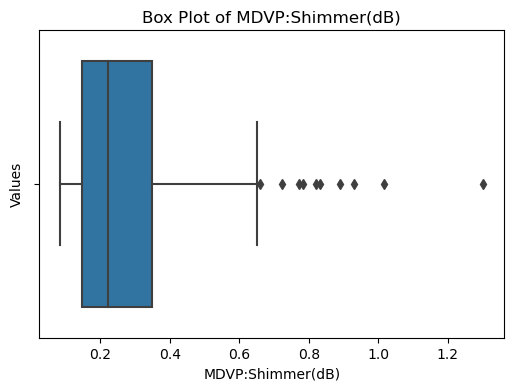

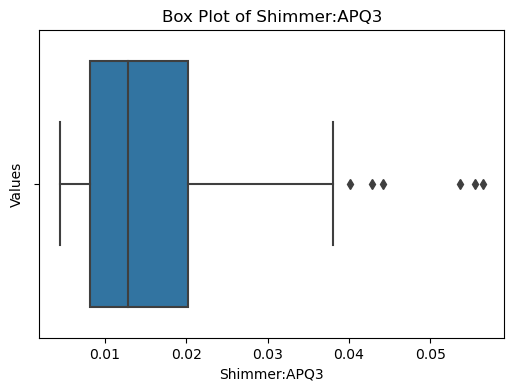

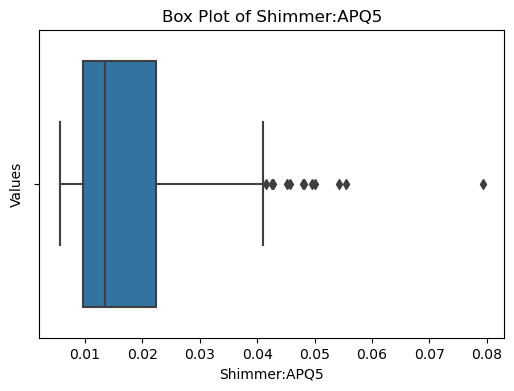

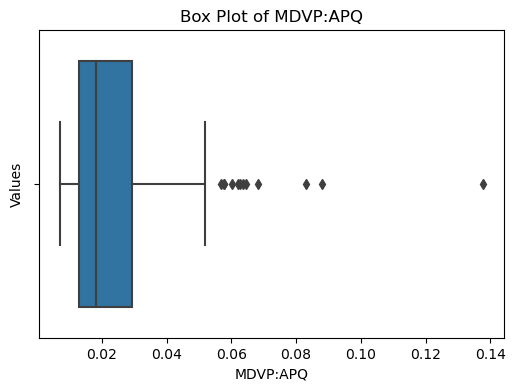

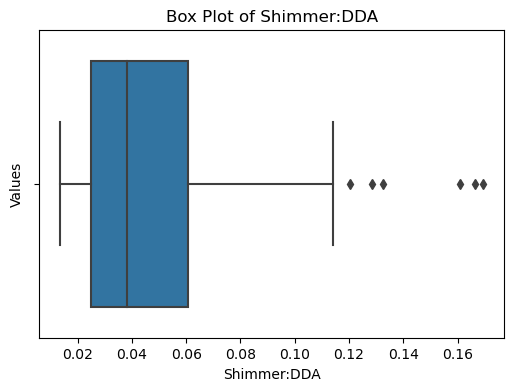

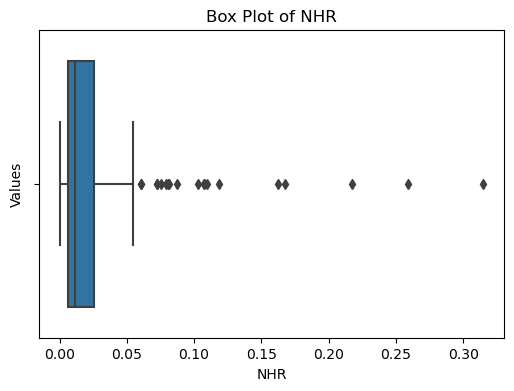

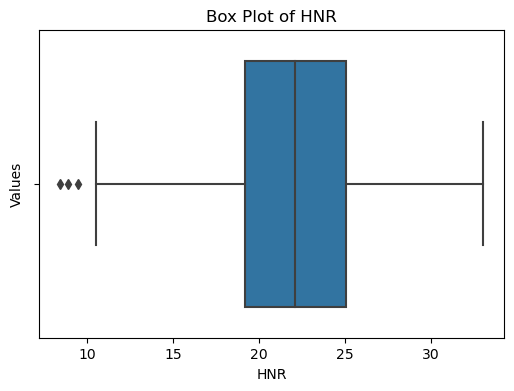

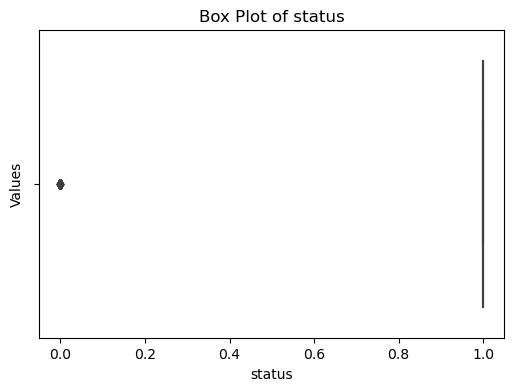

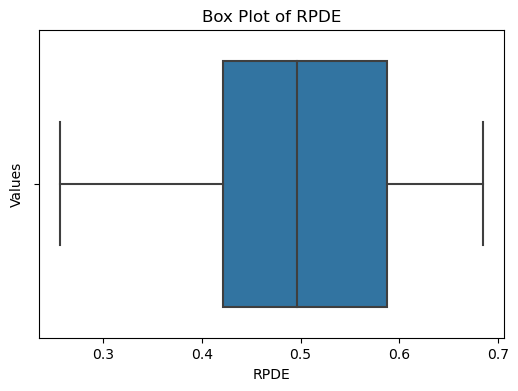

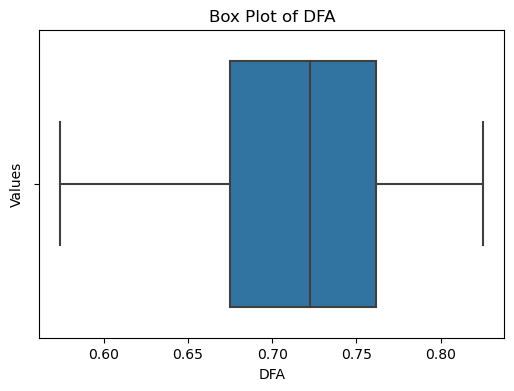

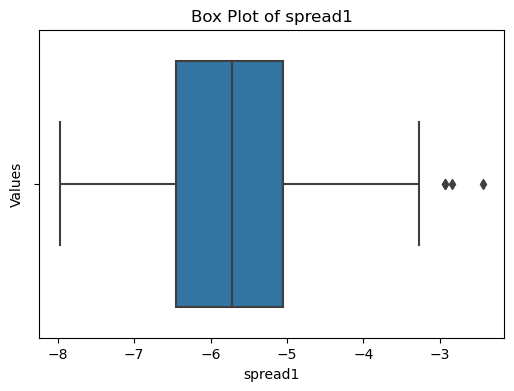

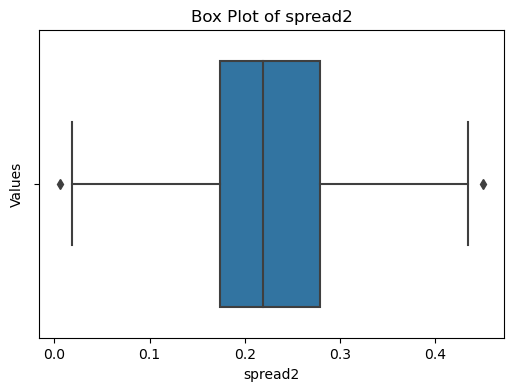

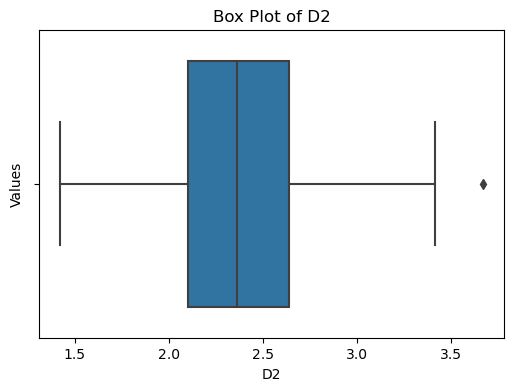

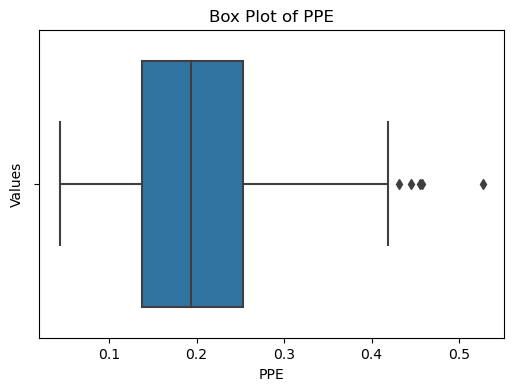

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_individual_boxplots(df):
    numeric_columns = df.select_dtypes(include=[np.number])  # Select numeric columns
    num_cols_list = numeric_columns.columns.tolist()

    for col in num_cols_list:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=numeric_columns[col])
        plt.title(f"Box Plot of {col}")
        plt.xlabel(col)
        plt.ylabel("Values")
        plt.show()

# Assuming you have a DataFrame named 'data'
create_individual_boxplots(df)


# Handle Outliers

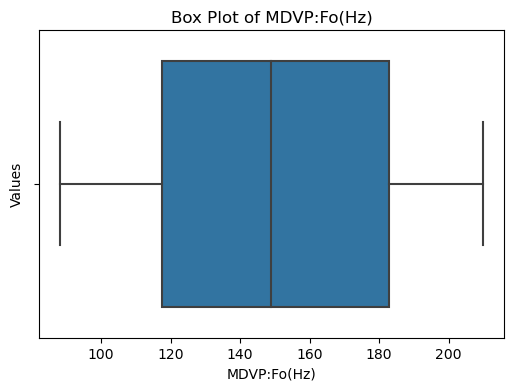

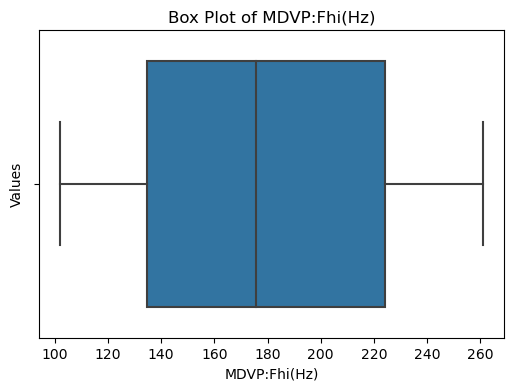

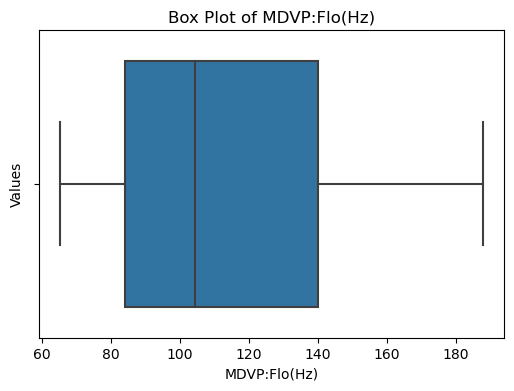

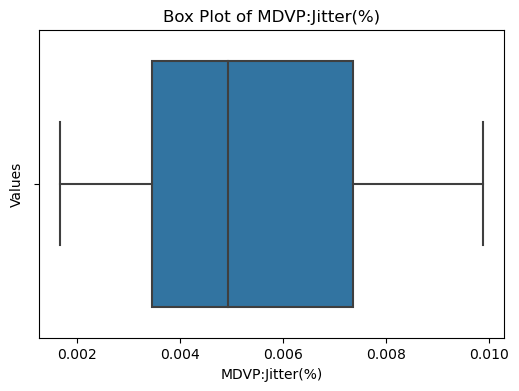

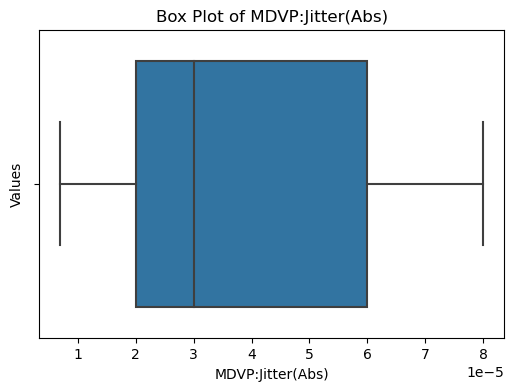

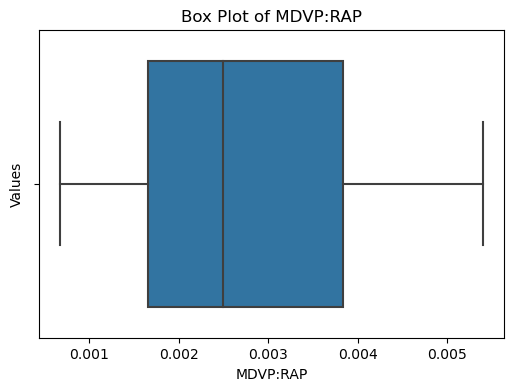

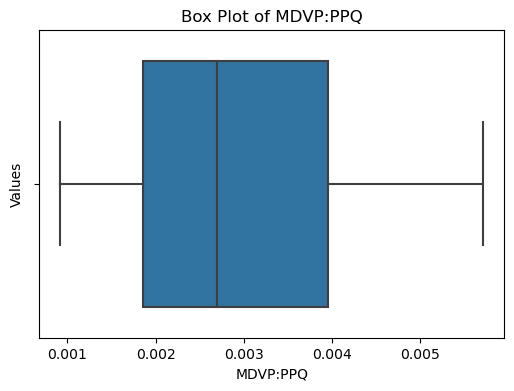

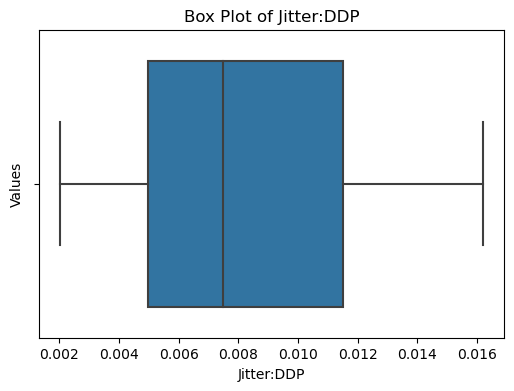

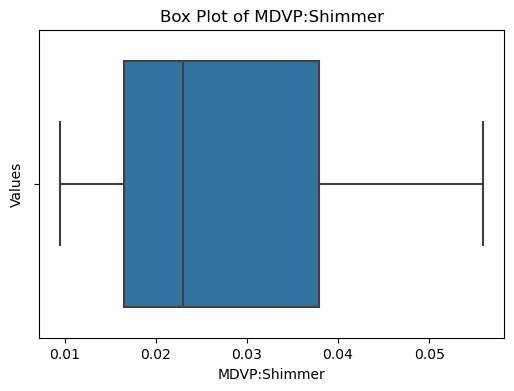

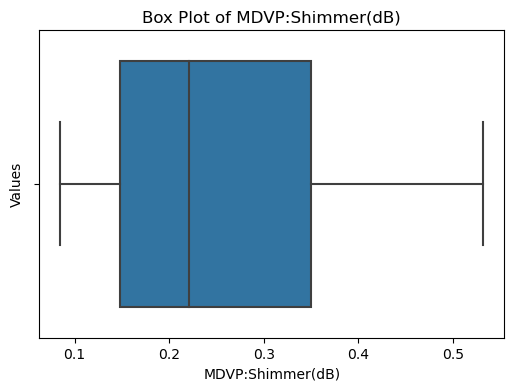

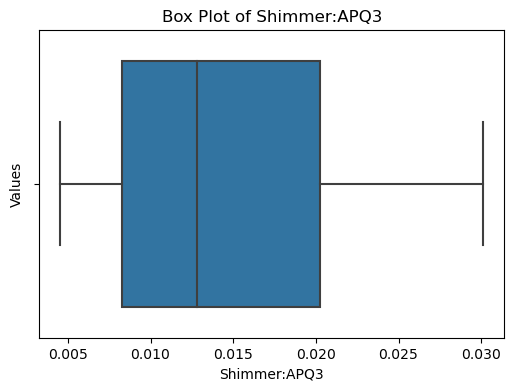

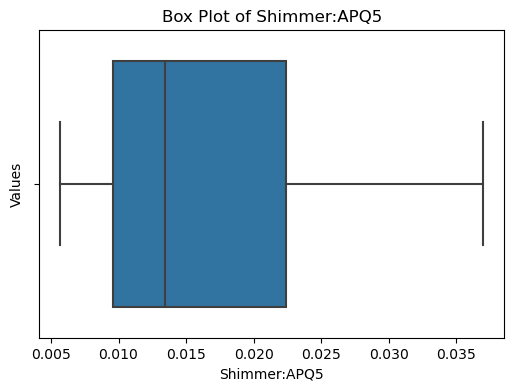

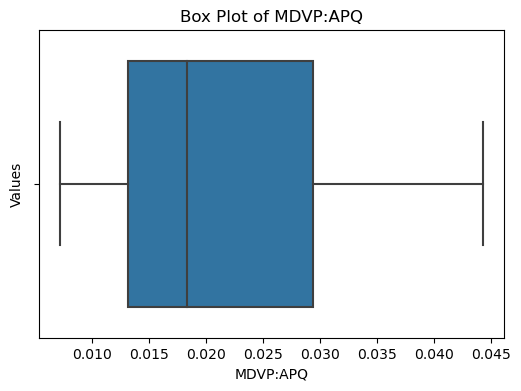

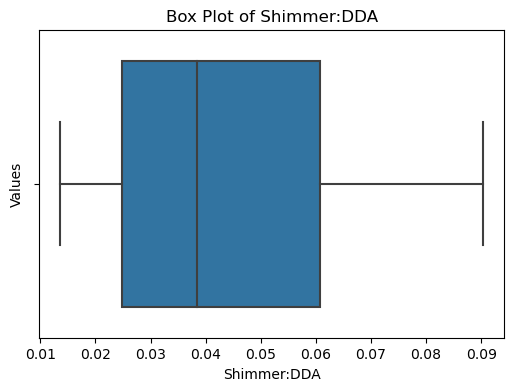

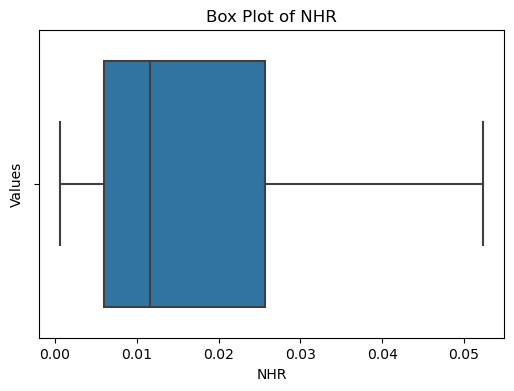

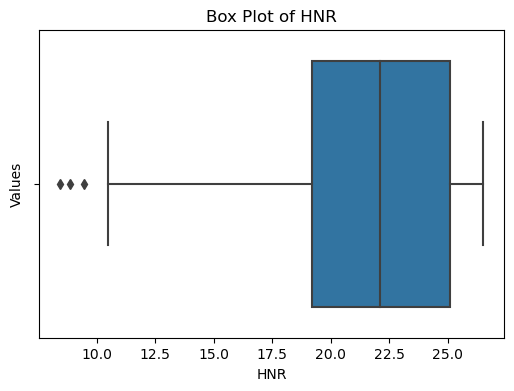

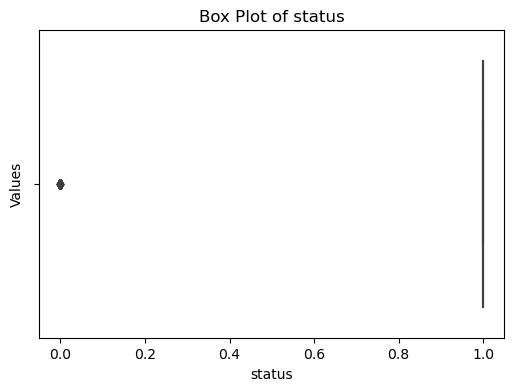

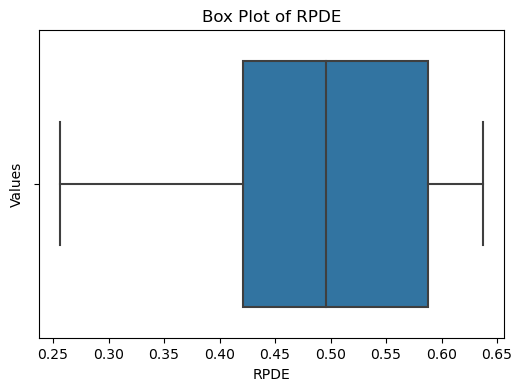

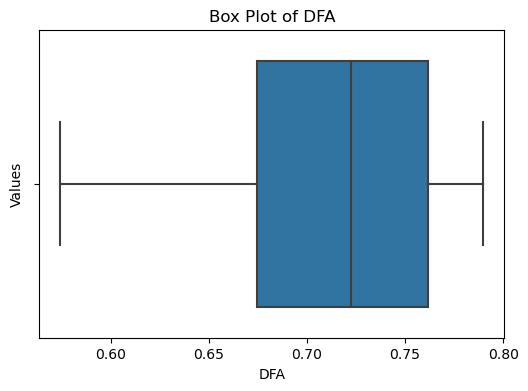

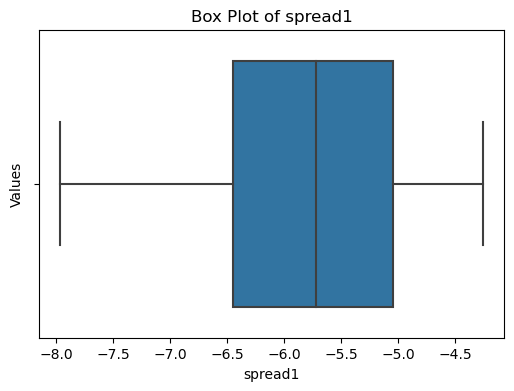

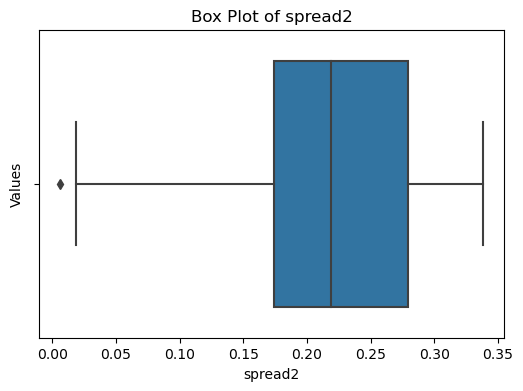

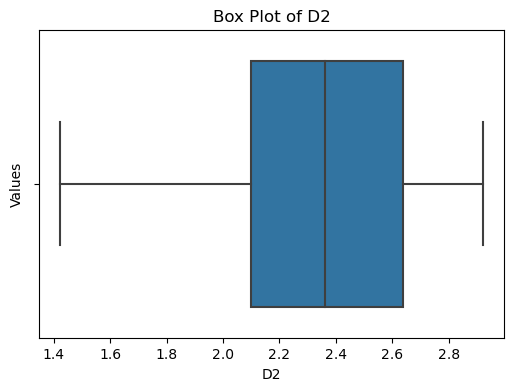

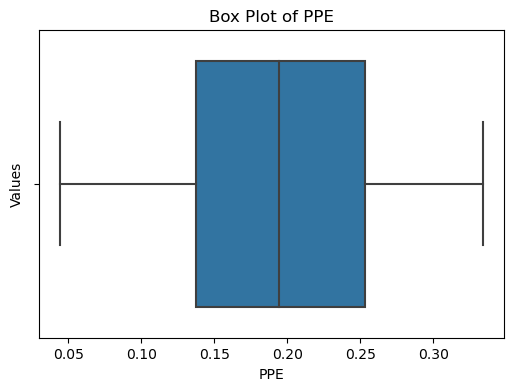

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def replace_outliers_with_percentile(df, percentile=90):
    numeric_columns = df.select_dtypes(include=[np.number])  # Select numeric columns
    num_cols_list = numeric_columns.columns.tolist()

    for col in num_cols_list:
        column_data = df[col]
        col_90th_percentile = np.percentile(column_data, percentile)
        df[col] = np.where(column_data > col_90th_percentile, col_90th_percentile, column_data)

    return df

# Assuming you have a DataFrame named 'data'
# This will modify 'data' DataFrame with outliers replaced by 90th percentile
df = replace_outliers_with_percentile(df)

# Now, create individual box plots for the modified DataFrame
def create_individual_boxplots(df):
    numeric_columns = df.select_dtypes(include=[np.number])  # Select numeric columns
    num_cols_list = numeric_columns.columns.tolist()

    for col in num_cols_list:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=numeric_columns[col])
        plt.title(f"Box Plot of {col}")
        plt.xlabel(col)
        plt.ylabel("Values")
        plt.show()

create_individual_boxplots(df)


# Exploratory Data Analysis

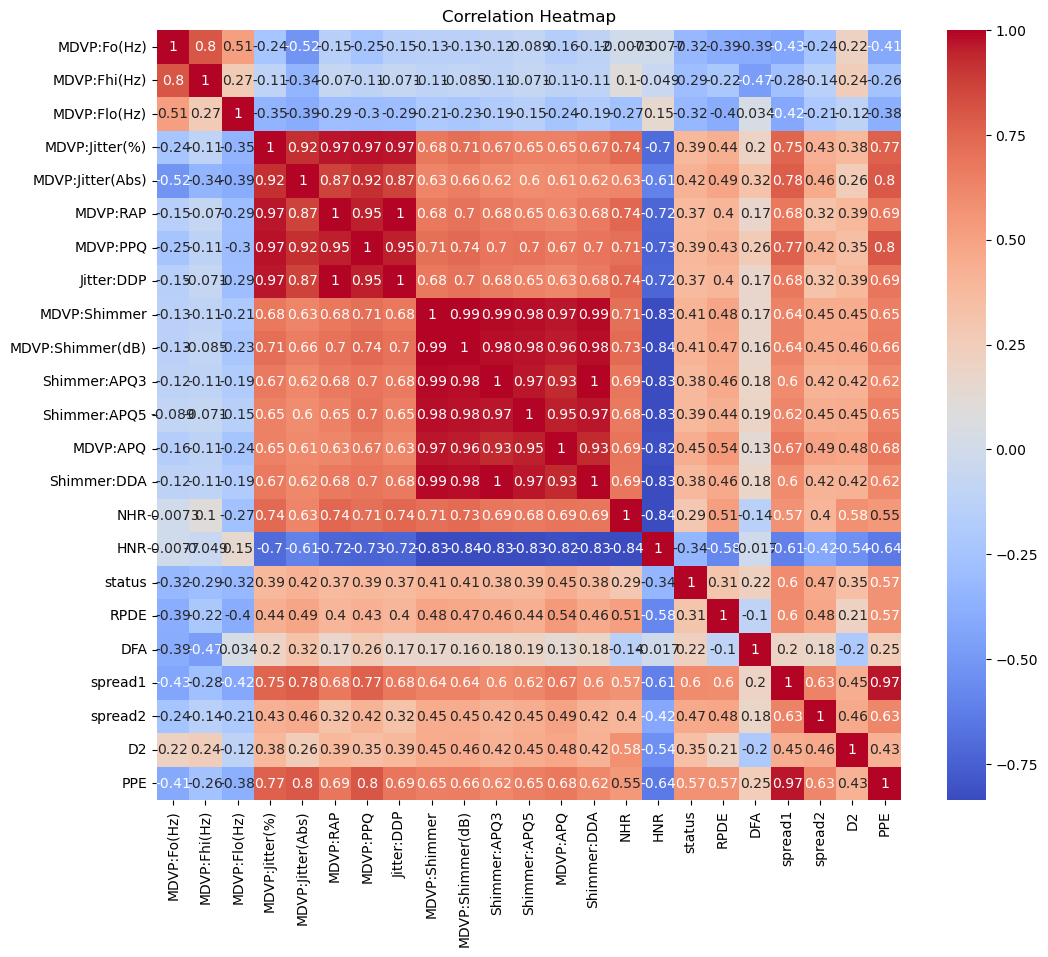

In [22]:
# Correlation heatmap for numeric features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# # Pairplot to visualize relationships between numeric features
# sns.pairplot(data=df, hue='status', diag_kind='kde')
# plt.title("Pairplot of Numeric Features")
# plt.show()

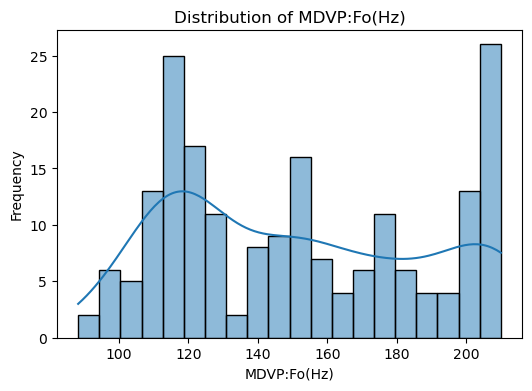

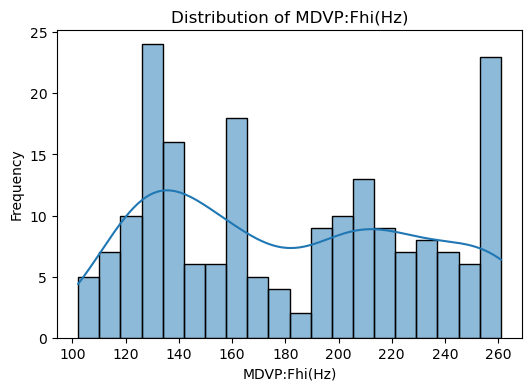

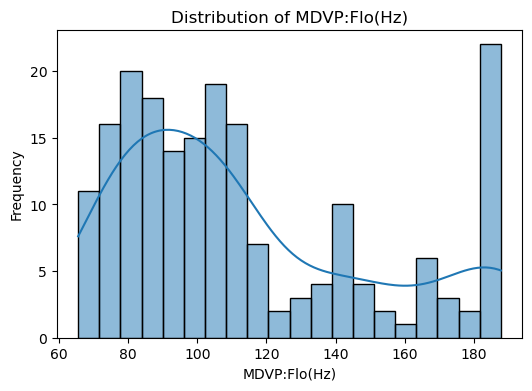

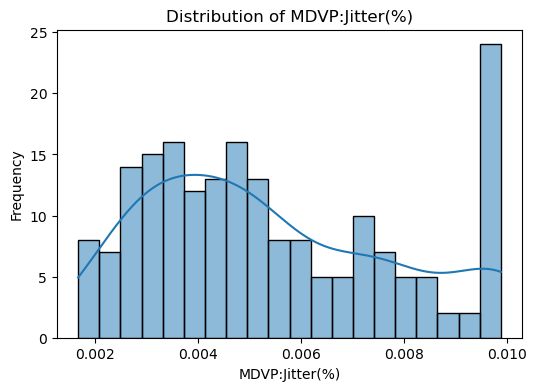

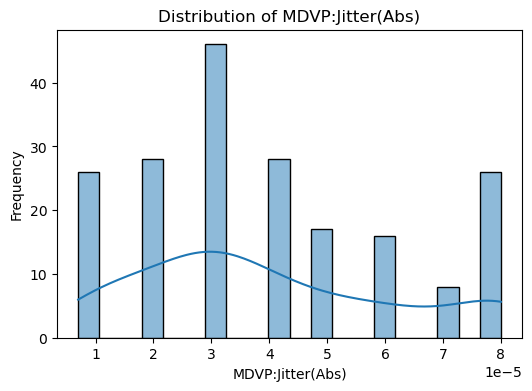

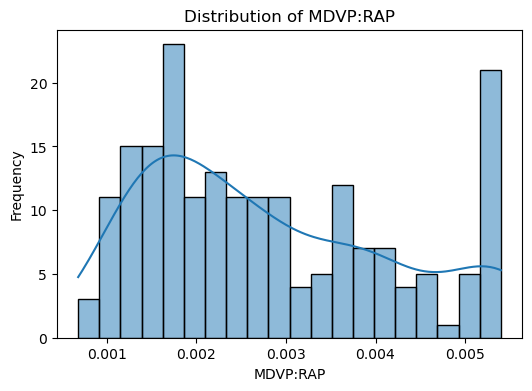

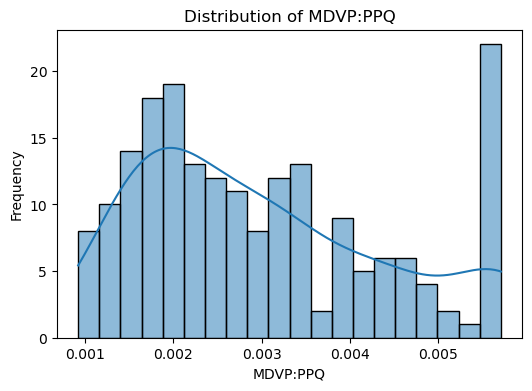

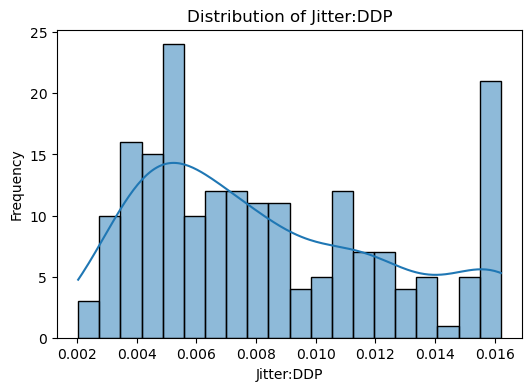

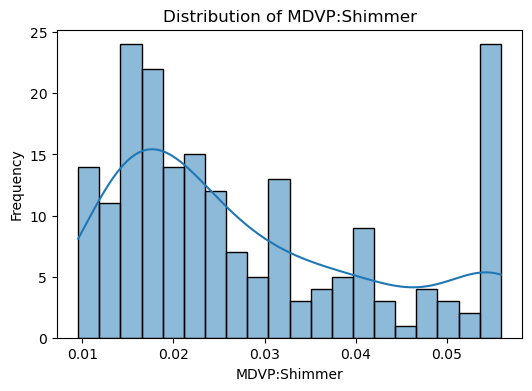

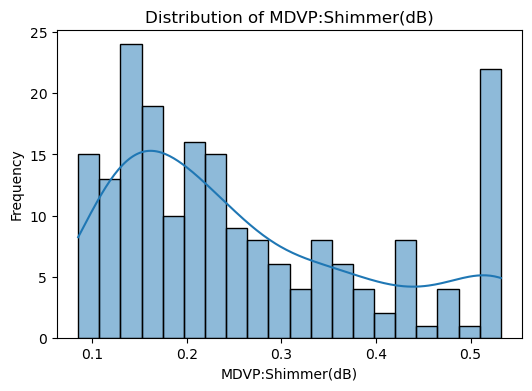

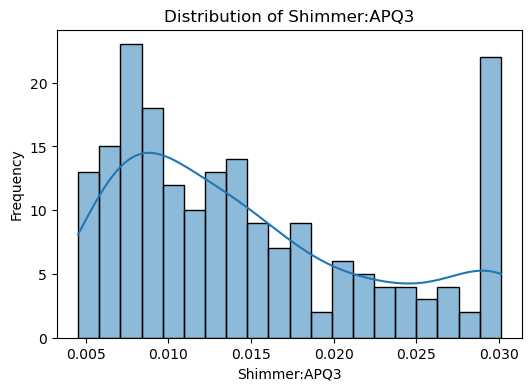

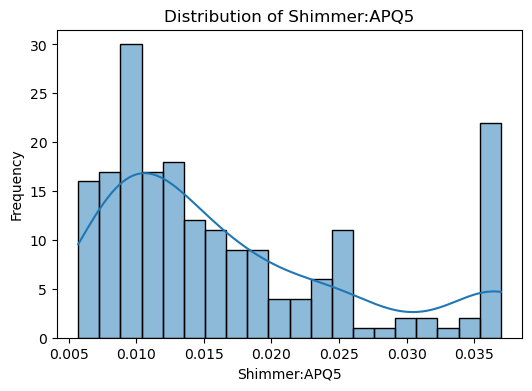

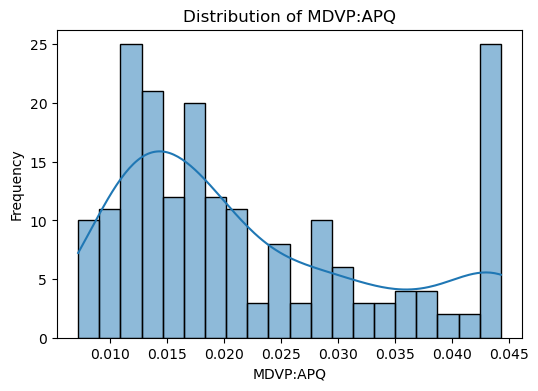

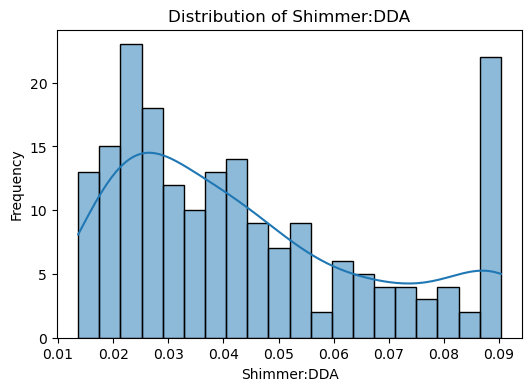

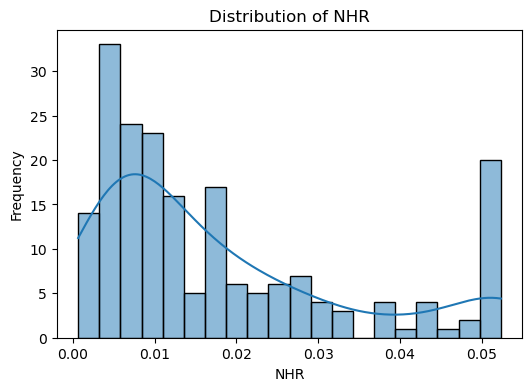

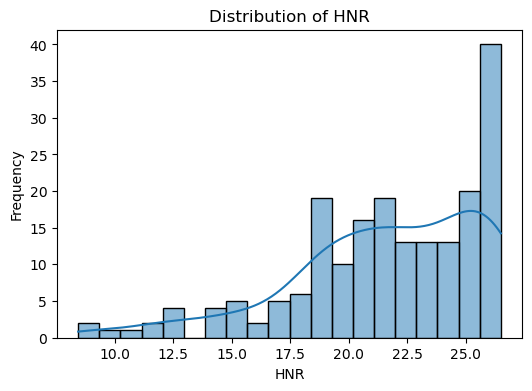

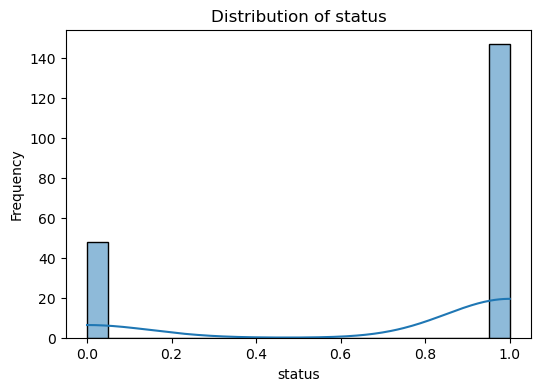

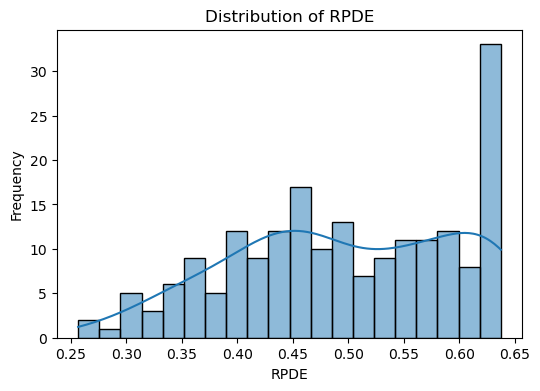

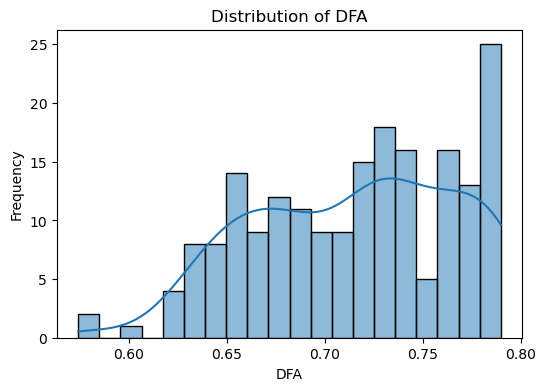

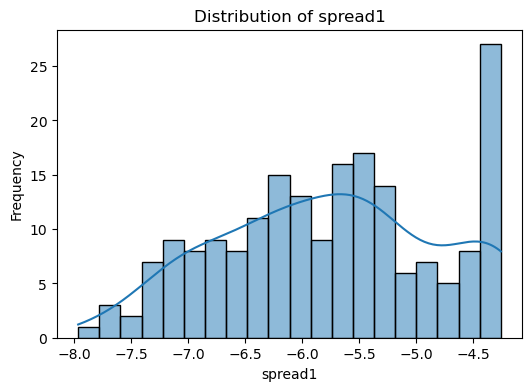

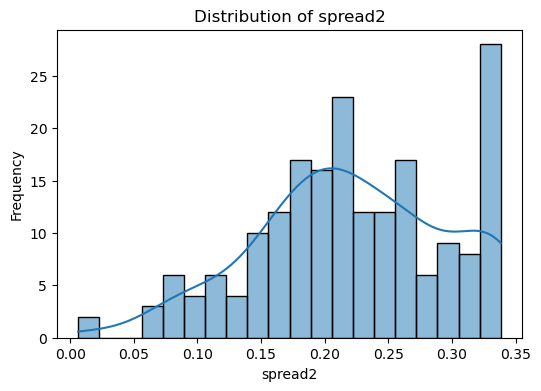

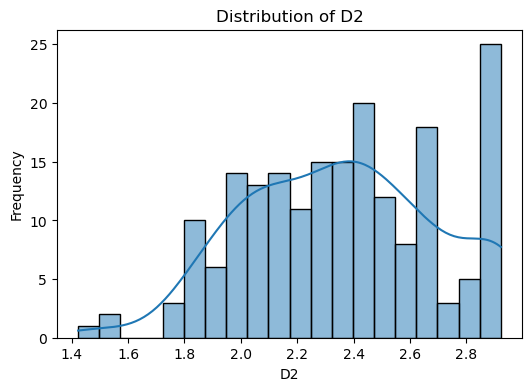

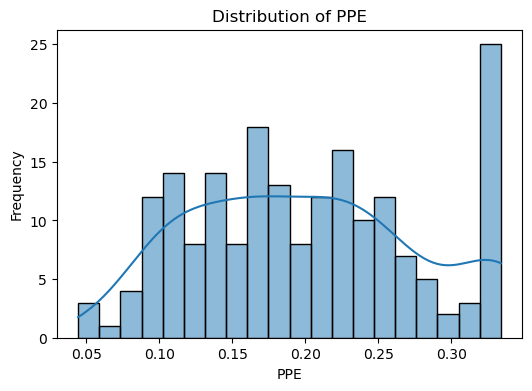

In [24]:
# Distribution plots for numeric features
def create_distribution_plots(df):
    numeric_columns = df.select_dtypes(include=[np.number])
    num_cols_list = numeric_columns.columns.tolist()

    for col in num_cols_list:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

create_distribution_plots(df)

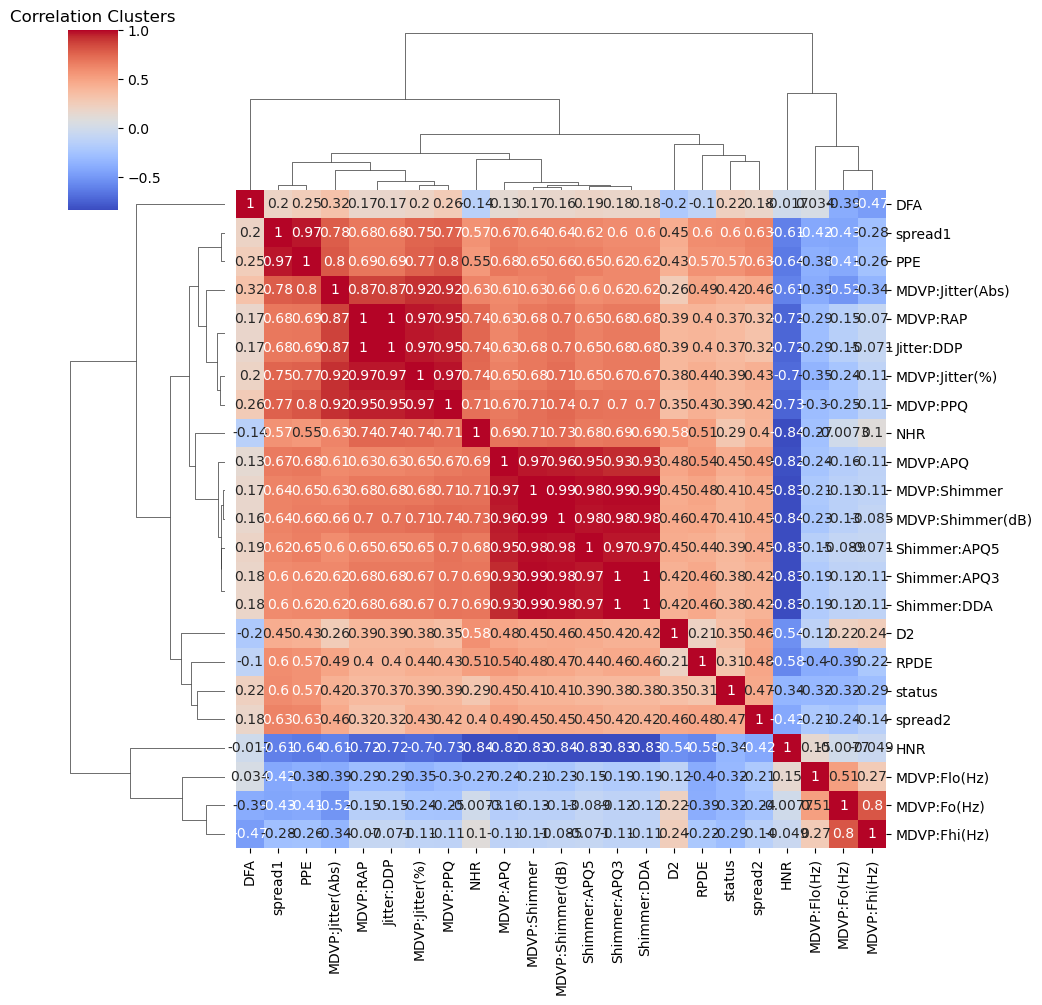

In [25]:
correlation_matrix = df.corr()
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Correlation Clusters")
plt.show()

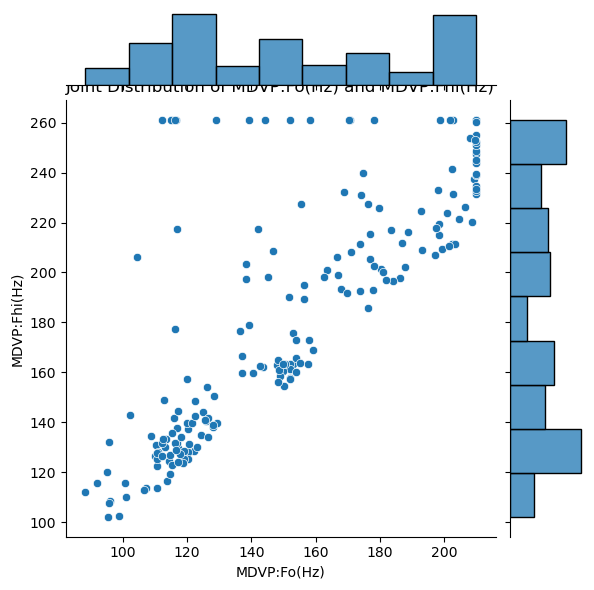

In [26]:
sns.jointplot(x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', data=df, kind='scatter')
plt.title("Joint Distribution of MDVP:Fo(Hz) and MDVP:Fhi(Hz)")
plt.show()

In [27]:
# Columns to apply transformations to
columns_to_transform = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']

# Apply log transformation to selected columns
df[columns_to_transform] = np.log1p(df[columns_to_transform])

# Columns to apply square root transformation to
columns_to_sqrt = ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP']

# Apply square root transformation to selected columns
df[columns_to_sqrt] = np.sqrt(df[columns_to_sqrt])

In [28]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,4.795724,5.064505,4.330694,0.088544,0.008367,0.060828,0.005540,0.011090,0.043740,0.426,0.021820,0.031300,0.029710,0.06545,0.022110,21.033,1.0,0.414783,0.789799,-4.813031,0.266482,2.301442,0.284654
1,4.815431,5.008299,4.743357,0.098387,0.008944,0.068191,0.005712,0.013940,0.055926,0.532,0.030116,0.036972,0.043680,0.09035,0.019290,19.085,1.0,0.458359,0.789799,-4.256362,0.335590,2.486855,0.334078
2,4.767986,4.883642,4.723442,0.099408,0.008944,0.073485,0.005712,0.016202,0.052330,0.482,0.027570,0.036972,0.035900,0.08270,0.013090,20.651,1.0,0.429895,0.789799,-4.443179,0.311173,2.342259,0.332634
3,4.767935,4.933545,4.721761,0.099408,0.008944,0.070852,0.005712,0.015050,0.054920,0.517,0.029240,0.036972,0.037720,0.08771,0.013530,20.644,1.0,0.434969,0.789799,-4.256362,0.334147,2.405554,0.334078
4,4.762294,4.961312,4.715414,0.099408,0.008944,0.073485,0.005712,0.016202,0.055926,0.532,0.030116,0.036972,0.044298,0.09035,0.017670,19.649,1.0,0.417356,0.789799,-4.256362,0.234513,2.332180,0.334078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,5.165860,5.446643,4.556620,0.067750,0.005477,0.051284,0.002590,0.007900,0.040870,0.405,0.023360,0.024980,0.027450,0.07008,0.027640,19.517,0.0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,5.349562,5.537401,4.505217,0.075100,0.005477,0.057533,0.002920,0.009940,0.027510,0.263,0.016040,0.016570,0.018790,0.04812,0.018100,19.147,0.0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,5.168710,5.484818,4.321307,0.099408,0.008944,0.073485,0.005640,0.016202,0.023080,0.256,0.012680,0.013650,0.016670,0.03804,0.052348,17.883,0.0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,5.297137,5.568356,4.329469,0.086023,0.006325,0.060828,0.003900,0.011090,0.022960,0.241,0.012650,0.013210,0.015880,0.03794,0.052348,19.020,0.0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# Data Splitting

In [29]:
X = df.drop('status',axis=1)
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,4.795724,5.064505,4.330694,0.088544,0.008367,0.060828,0.005540,0.011090,0.043740,0.426,0.021820,0.031300,0.029710,0.06545,0.022110,21.033,0.414783,0.789799,-4.813031,0.266482,2.301442,0.284654
1,4.815431,5.008299,4.743357,0.098387,0.008944,0.068191,0.005712,0.013940,0.055926,0.532,0.030116,0.036972,0.043680,0.09035,0.019290,19.085,0.458359,0.789799,-4.256362,0.335590,2.486855,0.334078
2,4.767986,4.883642,4.723442,0.099408,0.008944,0.073485,0.005712,0.016202,0.052330,0.482,0.027570,0.036972,0.035900,0.08270,0.013090,20.651,0.429895,0.789799,-4.443179,0.311173,2.342259,0.332634
3,4.767935,4.933545,4.721761,0.099408,0.008944,0.070852,0.005712,0.015050,0.054920,0.517,0.029240,0.036972,0.037720,0.08771,0.013530,20.644,0.434969,0.789799,-4.256362,0.334147,2.405554,0.334078
4,4.762294,4.961312,4.715414,0.099408,0.008944,0.073485,0.005712,0.016202,0.055926,0.532,0.030116,0.036972,0.044298,0.09035,0.017670,19.649,0.417356,0.789799,-4.256362,0.234513,2.332180,0.334078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,5.165860,5.446643,4.556620,0.067750,0.005477,0.051284,0.002590,0.007900,0.040870,0.405,0.023360,0.024980,0.027450,0.07008,0.027640,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,5.349562,5.537401,4.505217,0.075100,0.005477,0.057533,0.002920,0.009940,0.027510,0.263,0.016040,0.016570,0.018790,0.04812,0.018100,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,5.168710,5.484818,4.321307,0.099408,0.008944,0.073485,0.005640,0.016202,0.023080,0.256,0.012680,0.013650,0.016670,0.03804,0.052348,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,5.297137,5.568356,4.329469,0.086023,0.006325,0.060828,0.003900,0.011090,0.022960,0.241,0.012650,0.013210,0.015880,0.03794,0.052348,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [30]:
y = df['status']
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: status, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25,random_state=0)

In [33]:
Xtrain.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
92,5.005770,5.111922,4.964933,0.067750,0.005477,0.050000,0.00256,0.00750,0.04190,0.383,0.02383,0.02521,0.03051,0.07150,0.01914,18.7800,0.454444,0.734504,-5.952058,0.087840,2.344336,0.186489
185,4.764615,5.183417,4.584794,0.056036,0.005477,0.036606,0.00192,0.00403,0.01564,0.136,0.00667,0.00990,0.01691,0.02001,0.00737,24.1990,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
24,5.103858,5.307480,4.353871,0.086139,0.007071,0.061644,0.00390,0.01140,0.01659,0.164,0.00738,0.00948,0.01497,0.02214,0.01778,23.8310,0.397937,0.732479,-5.557447,0.220890,2.692176,0.215961
30,5.288651,5.337038,5.241090,0.053759,0.003162,0.040743,0.00168,0.00498,0.01098,0.097,0.00563,0.00680,0.00802,0.01689,0.00339,26.5094,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
109,5.268013,5.346631,4.398109,0.087521,0.006325,0.067082,0.00389,0.01351,0.03044,0.275,0.01771,0.01815,0.02084,0.05312,0.00947,21.9340,0.497554,0.740539,-5.845099,0.278679,2.608749,0.185668


In [34]:
Xtest.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
83,4.603208,4.637686,4.486432,0.065727,0.006325,0.049699,0.00258,0.00742,0.02223,0.202,0.01277,0.01343,0.01552,0.03831,0.00882,22.2440,0.576644,0.772416,-6.025367,0.078202,2.053601,0.177275
12,4.926717,5.080572,4.884891,0.054129,0.004472,0.034351,0.00153,0.00355,0.01259,0.112,0.00656,0.00717,0.01140,0.01968,0.00581,25.7030,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512
33,5.314515,5.359431,5.241090,0.042426,0.003000,0.030496,0.00107,0.00278,0.00954,0.085,0.00469,0.00606,0.00719,0.01407,0.00072,26.5094,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141
113,5.351341,5.454064,5.227133,0.073075,0.005477,0.056657,0.00280,0.00964,0.01680,0.149,0.00861,0.01017,0.01301,0.02583,0.00620,23.6710,0.441097,0.722254,-5.963040,0.250283,2.489191,0.177807
171,4.732217,4.900627,4.670162,0.059582,0.005477,0.040743,0.00190,0.00499,0.01358,0.129,0.00664,0.00786,0.01140,0.01992,0.00435,26.4360,0.413295,0.756700,-6.323531,0.218885,2.193412,0.160376


In [35]:
ytrain.head()

92     1.0
185    0.0
24     1.0
30     0.0
109    1.0
Name: status, dtype: float64

In [36]:
ytest.head()

83     1.0
12     1.0
33     0.0
113    1.0
171    0.0
Name: status, dtype: float64

In [37]:
#feature scaling

In [38]:
sc = StandardScaler()

In [39]:
Xtrain_scaled = sc.fit_transform(Xtrain)

In [40]:
Xtest_scaled = sc.fit_transform(Xtest)

# Model Selection

In [41]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# List of classification models to try
models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier()),
]

# Iterate over each model and evaluate
for name, model in models:
    print(f"Training {name}...")
    model.fit(Xtrain_scaled, ytrain)
    y_pred = model.predict(Xtest_scaled)
    
    accuracy = accuracy_score(ytest, y_pred)
    report = classification_report(ytest, y_pred)
    
    print(f"Accuracy for {name}: {accuracy:.2f}")
    print()
    print()
    print(f"Classification Report for {name}:\n{report}\n")

Training Logistic Regression...
Accuracy for Logistic Regression: 0.84


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67        11
         1.0       0.92      0.87      0.89        38

    accuracy                           0.84        49
   macro avg       0.77      0.80      0.78        49
weighted avg       0.85      0.84      0.84        49


Training K-Nearest Neighbors...
Accuracy for K-Nearest Neighbors: 0.96


Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        11
         1.0       1.00      0.95      0.97        38

    accuracy                           0.96        49
   macro avg       0.92      0.97      0.94        49
weighted avg       0.97      0.96      0.96        49


Training Decision Tree...
Accuracy for Decision Tree: 0.94


Classification Report for Decision Tree:
  

In [42]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Iterate over each model and evaluate
for name, model in models:
    model.fit(Xtrain_scaled, ytrain)
    y_pred = model.predict(Xtest_scaled)
    accuracy = accuracy_score(ytest, y_pred)
    results_df = results_df.append({'Model': name, 'Accuracy': accuracy}, ignore_index=True)

# Display the results DataFrame
print(results_df)

                    Model  Accuracy
0     Logistic Regression  0.836735
1     K-Nearest Neighbors  0.959184
2           Decision Tree  0.938776
3           Random Forest  0.897959
4  Support Vector Machine  0.918367
5             Naive Bayes  0.734694
6       Gradient Boosting  0.918367


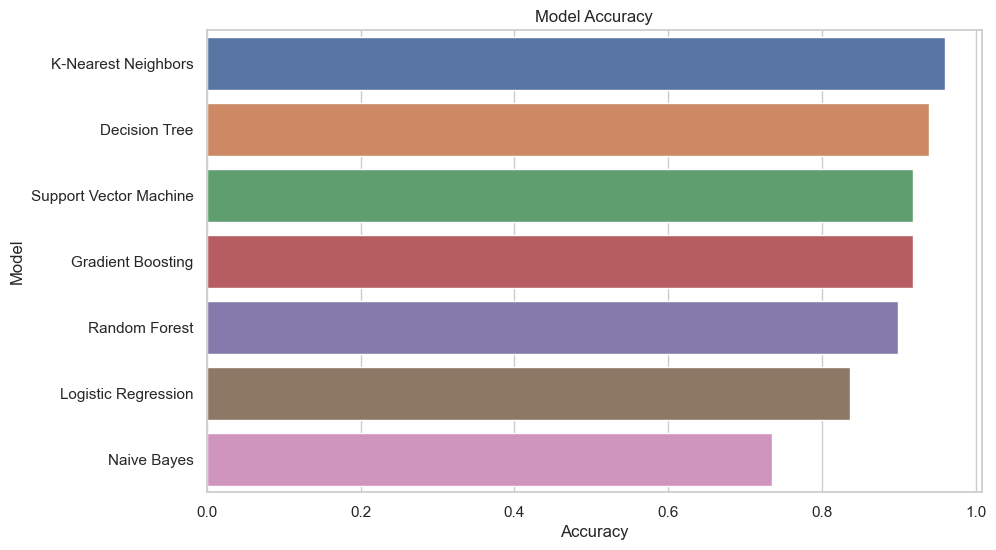

In [43]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy',ascending=False))
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [45]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# Iterate over each model and evaluate using cross-validation
for name, model in models:
    y_pred = cross_val_predict(model, Xtrain_scaled, ytrain, cv=5)  # 5-fold cross-validation
    
    accuracy = accuracy_score(ytrain, y_pred)
    precision = precision_score(ytrain, y_pred)
    recall = recall_score(ytrain, y_pred)
    f1 = f1_score(ytrain, y_pred)
    
    if hasattr(model, 'predict_proba'):
        probas = cross_val_predict(model, Xtrain_scaled, ytrain, cv=5, method='predict_proba')
        roc_auc = roc_auc_score(ytrain, probas[:, 1])
    else:
        roc_auc = None
    
    results_df = results_df.append({'Model': name, 'Accuracy': accuracy,
                                    'Precision': precision, 'Recall': recall,
                                    'F1-Score': f1, 'ROC-AUC': roc_auc}, ignore_index=True)

# Display the results DataFrame
print(results_df)

                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.842466   0.883929  0.908257  0.895928  0.884949
1     K-Nearest Neighbors  0.890411   0.911504  0.944954  0.927928  0.951649
2           Decision Tree  0.835616   0.882883  0.899083  0.890909   0.78304
3           Random Forest  0.890411   0.890756  0.972477  0.929825  0.942723
4  Support Vector Machine  0.869863   0.862903  0.981651  0.918455      None
5             Naive Bayes  0.712329   0.913580  0.678899  0.778947   0.83573
6       Gradient Boosting  0.890411   0.911504  0.944954  0.927928  0.941731


# Hyperparameter Tunning

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [47]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(Xtrain_scaled, ytrain)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best estimator to make predictions on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(Xtest_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(ytest, y_pred)
classification_rep = classification_report(ytest, y_pred)

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Score: 0.890574712643678
Test Accuracy: 0.8979591836734694
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        11
         1.0       0.92      0.95      0.94        38

    accuracy                           0.90        49
   macro avg       0.86      0.84      0.85        49
weighted avg       0.90      0.90      0.90        49



In [48]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform hyperparameter tuning
grid_search.fit(Xtrain_scaled, ytrain)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best estimator to make predictions on the test set
best_knn_model = grid_search.best_estimator_
y_pred = best_knn_model.predict(Xtest_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(ytest, y_pred)
classification_rep = classification_report(ytest, y_pred)

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Score: 0.9312643678160919
Test Accuracy: 0.9591836734693877
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        11
         1.0       1.00      0.95      0.97        38

    accuracy                           0.96        49
   macro avg       0.92      0.97      0.94        49
weighted avg       0.97      0.96      0.96        49



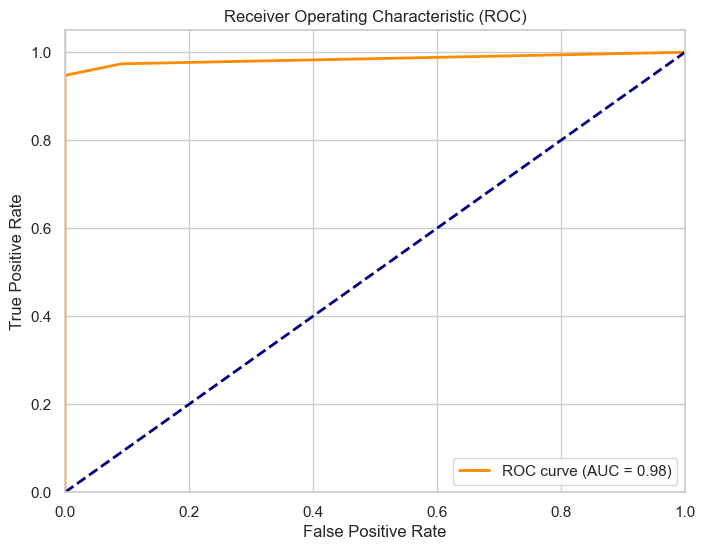

In [49]:
from sklearn.metrics import roc_curve, auc

# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3, p=1, weights='uniform')
knn_model.fit(Xtrain_scaled, ytrain)

# Get predicted probabilities
y_prob = knn_model.predict_proba(Xtest_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

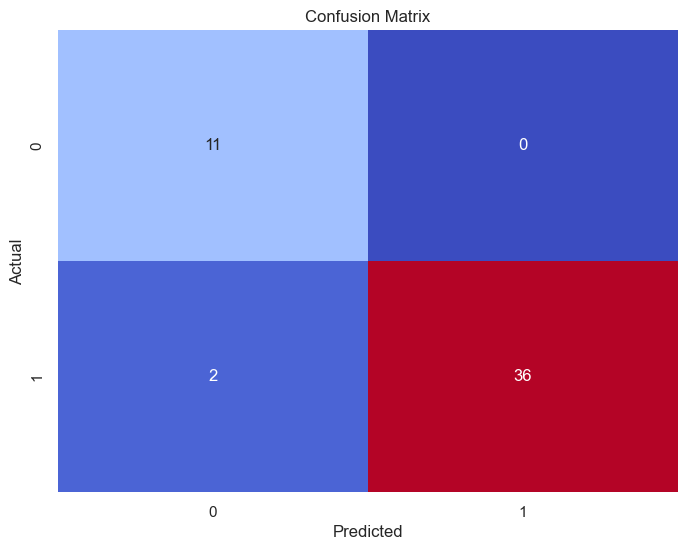

In [50]:
# Create a confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Choose a different color palette
color_palette = sns.color_palette("coolwarm", as_cmap=True)

# Plot the confusion matrix with the chosen color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=color_palette, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model Saving

In [51]:
import joblib

In [52]:
# Save the trained KNN model to a file
model_filename = 'knn_model.joblib'
joblib.dump(knn_model, model_filename)

print(f"Trained KNN model saved as '{model_filename}'")

Trained KNN model saved as 'knn_model.joblib'


# Thank You!